## Is Fandango Inflating Ratings?

### Introduction

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased - they were rounding up ratings.

In response to the article, Fandango replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible.

In this project, we'll analyze more recent movie ratings to determine whether there has been any change in Fandango's rating system.

### Understanding the Data

In [1]:
# read-in data
import pandas as pd
fandango_before = pd.read_csv('fandango_score_comparison.csv')
fandango_after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
# isolate columns from each dataset
before = ['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']
after = ['movie','year','fandango']

fandango_before = fandango_before[before]
fandango_after = fandango_after[after]

In [3]:
# confirm subset before
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
# confirm subset after
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In this project, our goal is to confirm whether Fandango did in fact adjust their rating system after Hickey article was released. Basically we need to compare the population of movies and their ratings regardless of release year.

But there are some issues with these datasets when it comes to answering this question. 

The Hickey dataset has the following characteristics:
- contains every film with Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score
- has at least 30 fan ratings

So this sample does not represent the population. It was sampled with specific criteria in mind, not randomly.

The data in the other sample had the following characteristics:
- 214 of the most popular movies (based on a 'significant' number of votes)
- from the years 2016, 2017

Again, another sample that is based on specific criteria and not at all random. Also, significant number of votes is not precise compared to the other set's criteria of 'at least 30 fan ratings,' so it's hard to say that these sets are even worthy of close comparison.

Basically, these samples are not likely representative of the population they were drawn from. As a result, any analysis we perform will have a fair amount of sampling error baked in and will not be too useful.

Perhaps we should adjust the goal of our analysis...

### Changing the Goal of our Analysis

Since we cannot resample data from the past, we will adjust the goal of our analysis. 

Since the samples were directed toward analyzing only the most popular movies, we will do the same.

So in this analysis we will compare ratings for the most popular movies in 2015 and 2016 to see if the trends in ratings changed.

### Isolating the Samples We Need

Since the Hickey analysis classified popular movies as those having "at least 30 fan ratings on Fandango," we will isolate our analysis to those movies.

In [6]:
# we know the before dataset consists of movies with more than 30 fan ratings
fandango_before.shape

(146, 5)

In [7]:
fandango_before[fandango_before['Fandango_votes'] >= 30].shape

(146, 5)

So we've confirmed that all the movies in the Hickey set meet the criteria.

But what about the other dataset? 

There is no count for number of fan ratings in this dataset.

Let's take a random sample and manually check on Fandango to be sure that they all have at least 30 fan ratings.

In [8]:
# draw a sample from the after set
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In this sample, 90% have 30 or more ratings, so we'll say that it's representative enough.

Next, we need to be sure we're only looking at movies released in 2015 and 2016.

In [9]:
# subset for 2015 from before set
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


We can see that the year is in the `FILM` column, so we need to separate that into its own column.

In [10]:
# separate year into its own column
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
# filter for 2015
before_2015_only = fandango_before[fandango_before['Year'] == '2015']
before_2015_only.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [13]:
before_2015_only.shape

(129, 6)

Of the original 146 movies, 129 were released in 2015. Great! On to the other set.

In [14]:
# view shape of set
fandango_after.shape

(214, 3)

In [15]:
# view counts by year
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [16]:
# isolate 2016 into its own dataframe
after_2016_only = fandango_after[fandango_after['year'] == 2016]

In [17]:
# confirm subset
after_2016_only.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [18]:
after_2016_only.shape

(191, 3)

OK, so we've got 191 movies from 2016 in the second set. On to the analysis.

### Comparing Distribution Shapes for 2015 and 2016

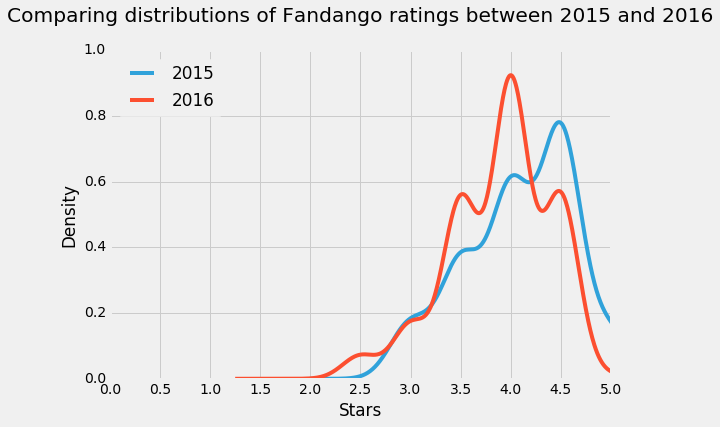

In [20]:
# generate kernel density plots
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

before_2015_only['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8, 5.5))
after_2016_only['fandango'].plot.kde(label= '2016', legend = True)

plt.title('Comparing distributions of Fandango ratings between 2015 and 2016', y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5) # limits range from 0 to 6
plt.xticks(arange(0,5.1,.5)) # set ticks on x-axis with .5 interval
plt.show()

The 2015 plots skew extremely left, with the majority of ratings landing around 4.5.

The 2016 plot skews left, but not as much as the 2015 set. Also the majority of its ratings revolve around 4.0. Also, it has a symmetric shape around the 4.0 peak.

In 2016, the probability that a movie would be ranked higher than about 4.2 or 4.3 is less than in 2015. However, there appears to be a higher probability of movies receiving scores between 3.3 or 3.4 to 4.0 than in 2015.

Whether this change is attributed to a change in rating or another factor will require more analysis.

### Comparing Relative Frequencies

Now let's take a look at the frequency tables for each dataset. Since we are comparing different numbers of movies from each dataset, we will normalize the tables to percentages.

In [22]:
# 2015 set
print ('2015' + '\n' + '-' *16)
before_2015_only['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
# 2016 set
print('2016' + '\n' + '-' *16)
after_2016_only['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, less than 1% of movies received 5 stars, compared to nearly 7% in 2015. 4.5 star ratings were also less frequent in 2016 compared to 2015 (24.6% vs. 38.0%)

Also, while there were no reviews less than 3 stars in 2015, about 3.1% of the reviews in 2016 were 2.5 stars.

In 2016, there were more 3.5 and 4.0 star reviews than in 2015.

### Determining the Direction of the Change

Let's take a couple summary statistics to understand the direction of change more clearly

In [28]:
# setup variables with stats
mean_2015 = before_2015_only['Fandango_Stars'].mean()
median_2015 = before_2015_only['Fandango_Stars'].median()
mode_2015 = before_2015_only['Fandango_Stars'].mode()[0] # without slice, datatype is included

mean_2016 = after_2016_only['fandango'].mean()
median_2016 = after_2016_only['fandango'].median()
mode_2016 = after_2016_only['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015,median_2015,mode_2015]
summary['2016'] = [mean_2016,median_2016,mode_2016]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


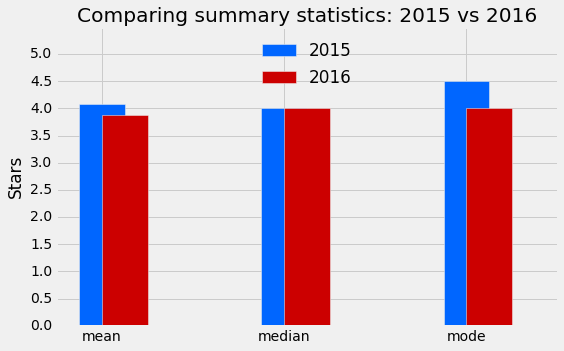

In [29]:
# generate grouped bar plot
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25 )
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

So, let's compare the summary stats.

Mean - the mean in 2015 was slightly higher than in 2016.
Median - the medians are precisely the same
Mode - the mode in 2015 was 0.5 stars higher than in 2016

Combined with what we saw in the kernel density plots we can conclude that, on average, the ratings in 2016 were lower than the ratings in 2015.

### Conclusion

On average, the ratings in 2016 were lower than the ratings in 2015.

We don't know, however, if that was due to any changes within Fandango or something else, but we can conclude that there was a change. There is some chance that the change was as a result of Hickey's data journalism.

## Next Steps
These are a few next steps to consider:

- Customize your graphs more by reproducing almost completely the FiveThirtyEight style. You can take a look [at this tutorial](https://www.dataquest.io/blog/making-538-plots/) if you want to do that.
- Improve your project from a stylistical point of view by following the guidelines discussed [in this style guide](https://www.dataquest.io/blog/data-science-project-style-guide).
- Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. There are many approaches you can take here — you can take some inspiration [from this article](https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19).
- Collect recent movie ratings data and formulate your own research questions. You can take a look [at this blog post](https://www.dataquest.io/blog/web-scraping-beautifulsoup/) to learn how to scrape movie ratings for IMDB and Metacritic.